In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import time

In [2]:
df = pd.read_csv("C:\\Paritosh\\SMU\\7333 Quantifying the World\\Proj\\CS6\\all_train.csv")

In [3]:
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [4]:
df.shape

(7000000, 29)

In [5]:
df.info(verbose=True, null_counts=True)
# no missing number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   # label  7000000 non-null  float64
 1   f0       7000000 non-null  float64
 2   f1       7000000 non-null  float64
 3   f2       7000000 non-null  float64
 4   f3       7000000 non-null  float64
 5   f4       7000000 non-null  float64
 6   f5       7000000 non-null  float64
 7   f6       7000000 non-null  float64
 8   f7       7000000 non-null  float64
 9   f8       7000000 non-null  float64
 10  f9       7000000 non-null  float64
 11  f10      7000000 non-null  float64
 12  f11      7000000 non-null  float64
 13  f12      7000000 non-null  float64
 14  f13      7000000 non-null  float64
 15  f14      7000000 non-null  float64
 16  f15      7000000 non-null  float64
 17  f16      7000000 non-null  float64
 18  f17      7000000 non-null  float64
 19  f18      7000000 non-null  float64
 20  f1

In [6]:
#summary stats
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [7]:
#remove "#" from label name
df.rename(columns={'# label':'label'}, inplace=True)
#check to make sure target is only 0 and 1
df.label.unique()

array([1., 0.])

In [8]:
#change label to boolean to save a bit of space
df.label = df.label.astype('bool')
df['label'].head()

0     True
1     True
2    False
3     True
4    False
Name: label, dtype: bool

<AxesSubplot:title={'center':'Target Variable Class Distribution'}>

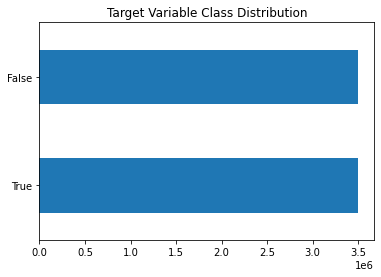

In [9]:
df['label'].value_counts().plot(kind='barh', title='Target Variable Class Distribution')

<AxesSubplot:>

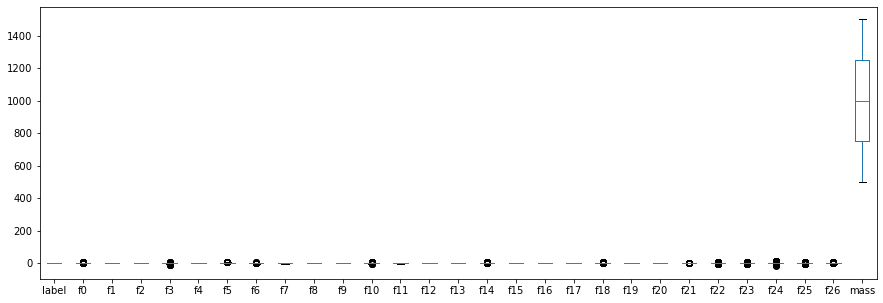

In [10]:
#Boxplots
df.boxplot(vert = True, grid = False, figsize = (15,5))

Text(0.5, 1.0, 'HeatMap-Correlation Matrix')

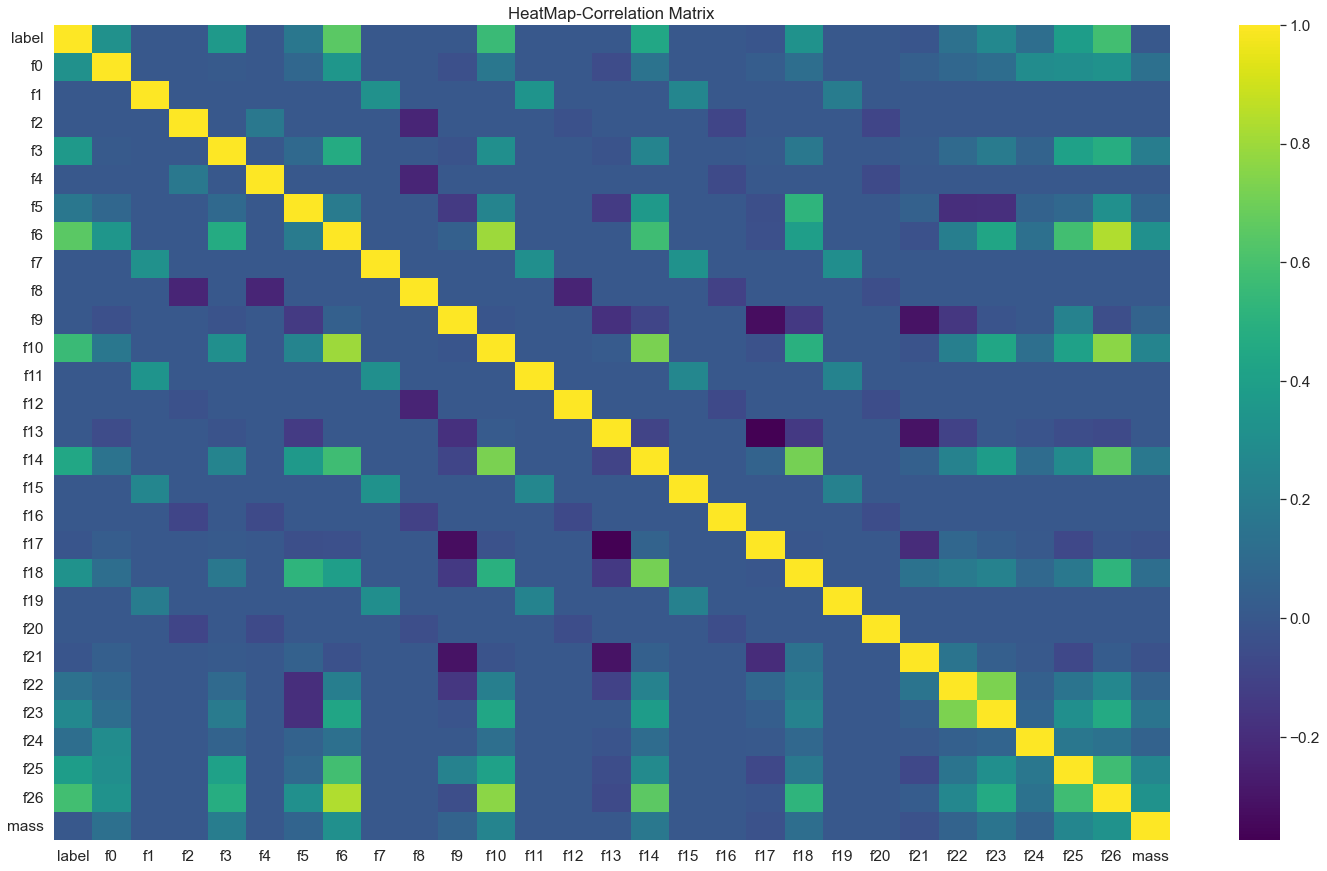

In [31]:
plt.figure(figsize=(25, 15))
#sns.heatmap(df.corr(), annot=True, fmt='.1g')
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), cmap='viridis')
plt.title('HeatMap-Correlation Matrix')

# Training/Test Sets and Data Normalization

In [11]:
## split dataset into independent (X) and target (y) variables
y = df['label']
X = df.drop(['label'], axis=1)
print('Size of target vector: ', y.shape)
print('-'*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (7000000,)
--------------------------------------------------
Size of explanatory matrix:  (7000000, 28)


In [12]:
## Check target counts
print("split between classes:  \n", '-----------------')
print(y.value_counts())

split between classes:  
 -----------------
True     3500879
False    3499121
Name: label, dtype: int64


In [13]:
## Creating training and test data - 10% witholding for test set (stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

## Test and train set counts - check that stratification was applied
print('Size of explanatory matrix for Training set: ',X_train.shape)
print('Size of explanatory matrix for Test set: ',X_test.shape)

print("Training set split between classes:  \n", '-----------------')
print(y_train.value_counts())

print("Test set split between classes:  \n", '-----------------')
print(y_test.value_counts())

Size of explanatory matrix for Training set:  (4900000, 28)
Size of explanatory matrix for Test set:  (2100000, 28)
Training set split between classes:  
 -----------------
True     2450615
False    2449385
Name: label, dtype: int64
Test set split between classes:  
 -----------------
True     1050264
False    1049736
Name: label, dtype: int64


In [14]:
#Normalize all of the explanatory features with StandardScaler in train and test sets
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Models

## Logistic Regression for Accuracy Baseline

First, we will fit a Logistic Regression model as the basline to assess the accuracy.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

In [16]:
#Logistic Regression Model
lr_model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', random_state = 1) 
lr_model.fit(X_train,y_train)
preds = lr_model.predict(X_test)
acc = mt.accuracy_score(y_test,preds)
print("accuracy: ", acc)

accuracy:  0.8368385714285714


# Neural Network Model

We will now fit an initial Neural Network model with two dense layers and default parameter settings.

In [17]:
#Tensorflow Packages
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import InputLayer

In [48]:
#sequential NN model for classification
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(28,)))
model.add(layers.Dense(200,activation='relu')) 
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
#compile model - use accuracy for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               5800      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________


We will now fit the model and assess test accuracy.

In [51]:
#fit the model
model.fit(X_train, y_train, epochs=40,validation_data=(X_test,y_test), batch_size=10000)

Epoch 1/40
490/490 [==============================] - 5s 11ms/step - loss: 0.3183 - accuracy: 0.8523 - val_loss: 0.2871 - val_accuracy: 0.8669
Epoch 2/40
490/490 [==============================] - 5s 11ms/step - loss: 0.2820 - accuracy: 0.8702 - val_loss: 0.2782 - val_accuracy: 0.8727
Epoch 3/40
490/490 [==============================] - 6s 12ms/step - loss: 0.2758 - accuracy: 0.8743 - val_loss: 0.2738 - val_accuracy: 0.8755
Epoch 4/40
490/490 [==============================] - 6s 12ms/step - loss: 0.2723 - accuracy: 0.8763 - val_loss: 0.2713 - val_accuracy: 0.8770
Epoch 5/40
490/490 [==============================] - 5s 11ms/step - loss: 0.2699 - accuracy: 0.8778 - val_loss: 0.2694 - val_accuracy: 0.8782
Epoch 6/40
490/490 [==============================] - 5s 11ms/step - loss: 0.2682 - accuracy: 0.8787 - val_loss: 0.2678 - val_accuracy: 0.8788
Epoch 7/40
490/490 [==============================] - 6s 11ms/step - loss: 0.2669 - accuracy: 0.8796 - val_loss: 0.2668 - val_accuracy: 0.8796

The test accuracy we have reached after 30 epochs is 0.8828. Let us now look at the trend in the test loss.

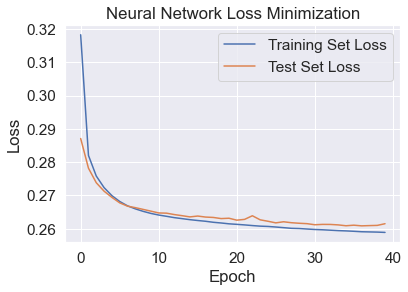

In [52]:
#need labels
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.title('Neural Network Loss Minimization')
plt.plot(train_loss, label='Training Set Loss')
plt.plot(val_loss, label='Test Set Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

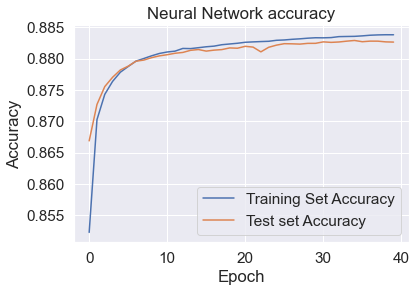

In [53]:
#need labels
train_acc = model.history.history['accuracy']
val_acc= model.history.history['val_accuracy']
plt.title('Neural Network accuracy')
plt.plot(train_acc, label='Training Set Accuracy')
plt.plot(val_acc, label='Test set Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
model.evaluate(X_train, y_train)

153125/153125 [==============================] - 116s 760us/step - loss: 0.2589 - accuracy: 0.8840 59s - loss: 0.2586 - ETA: 58s - loss: 0.2587 - - ETA: 58s - loss: 0.2587 -  - - ETA: 54s - loss: 0.2587 - accuracy: 0 - ETA: 54s - loss: 0.2587 - accuracy - ETA: 54s - l - ETA: 52s - l - ET - ETA: 49s - loss: 0.2585 - accur - ETA: 37s - loss: 0.2587 - accuracy: 0. - ETA:  - ETA: 34s - loss: 0 - ETA: 33s - loss: 0.2586 - accuracy: 0.88 - ETA: 33s - loss:  - ETA: 27s - - ETA: 26s - loss: 0.2587 - accurac - ETA: 25s - loss: 0.2587 - accuracy:  - ETA: 25s - l - ETA: 4s - - ETA - ETA: 0s - loss: 0.2589 - accu


[0.25888684391975403, 0.8839624524116516]

In [55]:
model.evaluate(X_test, y_test)

65625/65625 [==============================] - 49s 751us/step - loss: 0.2615 - accuracy: 0.8826 48s - loss: 0.2 - ETA: 48s - loss: 0.2645 - accurac - ETA: 47s - loss: 0.2631 - accurac - ETA: 47 - ETA: 45s - loss: 0.2608 - accuracy: 0.8 - ETA: 45s - loss: 0.2606 - accuracy: 0.88 - ETA: 45s - loss: 0.2608 - accuracy: 0. - ETA: 44s - loss: 0 - ETA: 43s - loss: 0.2607 - a - ETA: 42s - loss: 0.2604 - ac - ETA: 42s - loss: 0.2600 - accuracy: - ETA: 41s - loss: 0. - ETA: 40s - loss: 0.2600 - accuracy: 0. - ETA: 40s - loss: 0.2600 - accuracy - ETA: 39s - loss: 0.2602  - ETA: 39s - loss: 0.2603 - - ETA: 38s - loss: 0 - ETA: 37s - loss: 0.2609 - accuracy: - ETA: 36s - loss:  - ETA: 35s - loss: 0.2 - ETA: 32s - l - ETA: 30s - loss: 0.2618 - ETA: 29s - loss: 0. - ETA: 28s  - ETA: 26s - loss: 0.2617 - accurac - ETA: 23s - loss: 0.2619 - accura - ETA: 23s - l - ETA: 21s - loss: 0.2618 - acc - ETA: 21s - loss: 0.2618 - accuracy: 0. - ETA: 18s - loss: 0.2619 -  - ETA: 17s - loss: 0.2 - ETA: 14s - loss

[0.26149359345436096, 0.8826223611831665]